In [3]:
from annoy import AnnoyIndex
import pandas as pd
from Config import Config as config
import matplotlib.pyplot as plt

In [4]:
df = pd.read_pickle(f'../models/{config.embedding_size}-Image-Embeddings.pkl')

In [5]:
f = config.embedding_size
t = AnnoyIndex(f, 'euclidean')
t.load('../models/embeddings.ann')

True

In [6]:
import time
def get_similar_images_annoy(img_index):
    start = time.time()
    base_img_id, base_vector = df.iloc[img_index, [1,0]]
    similar_img_ids = t.get_nns_by_item(img_index, 5)
    end = time.time()
    print(f'{(end - start) * 1000} ms')
    return base_img_id, df.iloc[similar_img_ids]

In [7]:
base_image, similar_images_df = get_similar_images_annoy(0)

9.35506820678711 ms


In [8]:
similar_items = similar_images_df['image_id'].to_list()

In [15]:
import os

def plot_items(items):
    base_path = "../data/raw/h-and-m-personalized-fashion-recommendations/images"
    fig, axes = plt.subplots(1, len(items), figsize=(15, 10))
    
    for i, item in enumerate(items):
        padded_item = f"0{item:04}"
        print(padded_item)
        sub_dir = os.path.join(base_path, padded_item[:3])
        img_path = os.path.join(sub_dir, f"{padded_item}.jpg")
        
        img = plt.imread(img_path)
        axes[i].imshow(img)
        if i != 0:
            axes[i].set_title(f"Item {i}")
        else:
            axes[i].set_title("Query item")
        axes[i].axis("off")
    
    plt.show()

0249136006
0513337001
0544531002
0890866002
0592986002


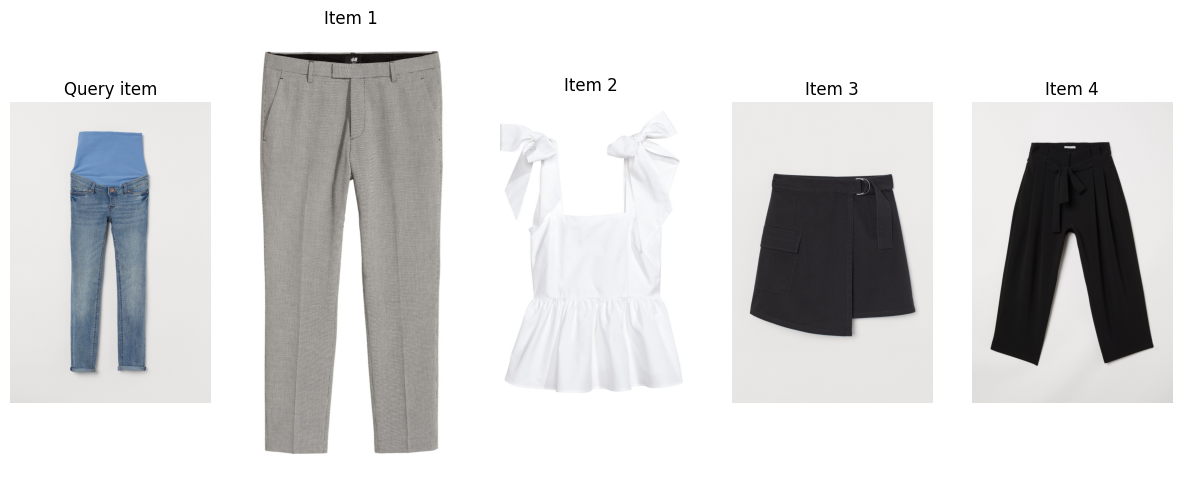

In [16]:
plot_items(similar_items)